In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # library sklearn, Module preprocessing, class MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [3]:
df = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates = ['Date'], dtype={'Time':str,'State':str,'Group':str})

In [4]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [20]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [5]:
df.isna().sum() # no missing values

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [7]:
df.notna().sum() # no missing values

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [ ]:
# if null values are there
# df.dropna(how='all', inplace = True)
# df["Sales"] = df["Sales"].fillna(df["Sales"].mean())

In [8]:
# DATA NORMALIZATION
df_dataonly=df[['Unit','Sales']]
normalize = MinMaxScaler()
normalize_data = normalize.fit_transform(df_dataonly)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])
# df

In [9]:
normalize_data[:,[0]] # normalized array of Unit values

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [10]:
normalize_data[:,[1]] # normalized array of Sales values

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [12]:
print(normalize_data[:,[0]].min(), " ", normalize_data[:,[0]].max()) # normalized min and max of Unit values

0.0   0.9999999999999999


In [13]:
print(normalize_data[:,[1]].min(), " ", normalize_data[:,[1]].max()) # normalized min and max of Sales values

0.0   1.0


In [4]:
# TOP LEVEL PICTURE
df_unit_and_sales = df.groupby(by='Date').sum(numeric_only=True)
df_unit_and_sales 
# State_Sales = df.groupby("State")["Sales"].sum().reset_index()
# print(State_Sales)

# print(State_Sales.sort_values(by="Sales", ascending=False))

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000


In [ ]:
# print(df[['Sales','Unit']].describe())
# print(df[['Sales','Unit']].mode())

# top_sales_group = df.groupby("Group")["Sales"].sum().idxmax()
# bottom_sales_group = df.groupby("Group")["Sales"].sum().idxmin()

#idxmax and idxmin to find the index of the maximum and minimum values, respectively, within a Series or DataFrame. 

# print(top_sales_group)
# print(bottom_sales_group)

In [ ]:
# df['Date']= pd.to_datetime(df['Date'])
# #extract week number
# df['Week']= df['Date'].dt.isocalendar().week 
# isocalendar only for week numbers, month and quarter are straightforward

# #extract the month number
# df['Month']= df['Date'].dt.month
# #extract the quater number
# df['Quarter']= df['Date'].dt.quarter

In [ ]:
# weekly_sales =df.groupby("Week")["Sales"].sum().reset_index()
# print(weekly_sales)
# Monthly_sales =df.groupby("Month")["Sales"].sum().reset_index()
# print(Monthly_sales)
# Quaterly_sales =df.groupby("Quarter")["Sales"].sum().reset_index()
# print(Quaterly_sales)

In [ ]:
# sns.set(style = "whitegrid")
# %matplotlib inline 
# to configure Matplotlib, the popular Python plotting library, to display plots directly within the output cells of 
# the notebook, rather than opening them in separate windows.

# ----------------------------------------------------------------------------
# state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
# state_group_sales.plot(kind='bar', stacked=True)    

In [ ]:
#Based on Group, color (hue) is decided

# state_group_sales = df.groupby(['State','Group'])['Sales'].sum().reset_index()
# plt.figure(figsize=(14,6))
# sns.barplot(data=state_group_sales , x='State', y='Sales', hue='Group')
# plt.title("State-wise Sales by customer Group")
# plt.show()

In [ ]:
# group_state_sales = df.groupby(['Group','State'])['Sales'].sum().reset_index()
# plt.figure(figsize=(14,6))
# sns.barplot(data=group_state_sales , x='Group', y='Sales', hue='State')
# plt.title("Group-wise Sales by State")
# plt.show()

In [ ]:
# plt.figure(figsize=(8,5))
# sns.boxplot(data=df, x="Time", y="Sales")
# plt.title("Time of day Sales (Q4)")
# plt.xlabel("Time of day")
# plt.ylabel("Total Sales")
# plt.grid(axis='y' ,linestyle="--", alpha=0.7)
# plt.show()

# ----------------------------------
# time_sales = df.groupby(['Time'])['Sales'].sum().reset_index()
# plt.figure(figsize=(14, 6))
# plt.bar(time_sales['Time'], time_sales['Sales'], color='skyblue')
# plt.title("Time sales analysis")
# plt.xlabel("Time")

In [ ]:
# line plot for trend

# daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
# plt.figure(figsize=(14,6))
# sns.lineplot(data = daily_sales, x='Date', y='Sales', marker='o')
# plt.title("Daily Sales Trend")
# plt.xlabel("Date")
# plt.ylabel("Total Sales")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.show()

In [ ]:
# plt.figure(figsize=(7,6))
# sns.lineplot(data=weekly_sales, x='Week', y='Sales', marker='o', errorbar=None, sort=False)
# plt.title("Weekly Sales Trend")
# plt.xlabel("Week")
# plt.ylabel("Total Sales")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(7,6))
# sns.barplot(data=Monthly_sales, x='Month', y='Sales')
# plt.title("Monthly Sales Trend")
# plt.xlabel("Month")
# plt.ylabel("Total Sales")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(7,6))
# sns.barplot(data=Quaterly_sales, x='Quarter', y='Sales')
# plt.title("Quarter Sales Trend")
# plt.xlabel("Quarter")
# plt.ylabel("Total Sales")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

In [5]:
# MONTHLY DATA ANALYSIS
df_oct = df_unit_and_sales.loc['2020-10-01':'2020-10-31']
df_nov = df_unit_and_sales.loc['2020-11-01':'2020-11-30']
df_dec = df_unit_and_sales.loc['2020-12-01':'2020-12-31']

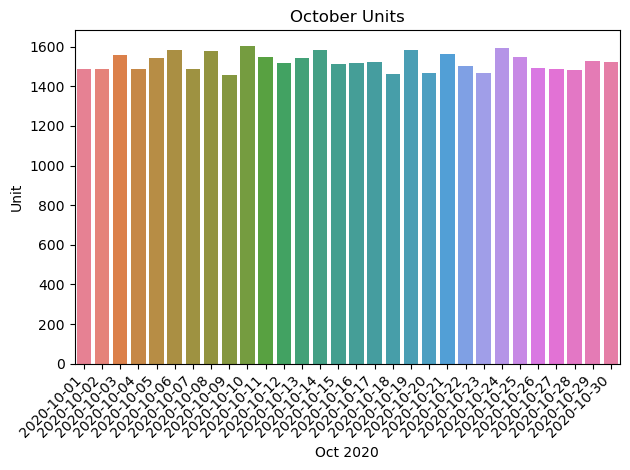

In [7]:
# PLOTTING BAR CHARTS FOR MONTHLY UNIT VALUES
ax = sns.barplot(x='Date', y= 'Unit', data = df_oct, hue = 'Date', legend = False)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Oct 2020')
ax.set_ylabel('Unit')
ax.set_title('October Units')
plt.tight_layout()
plt.show()

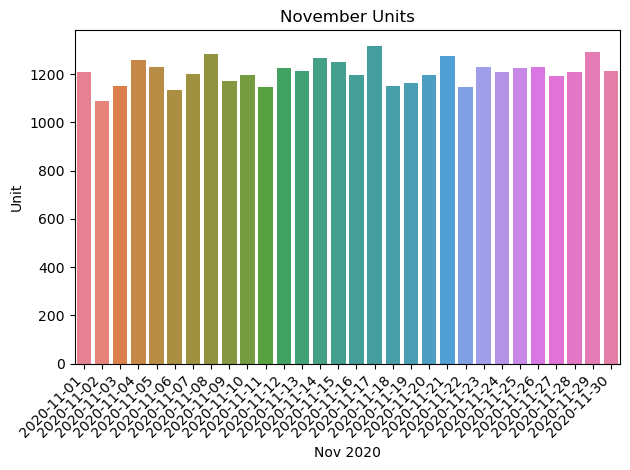

In [6]:
ax = sns.barplot(x='Date', y= 'Unit', data = df_nov, hue = 'Date', legend = False)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Nov 2020')
ax.set_ylabel('Unit')
ax.set_title('November Units')
plt.tight_layout()
plt.show()

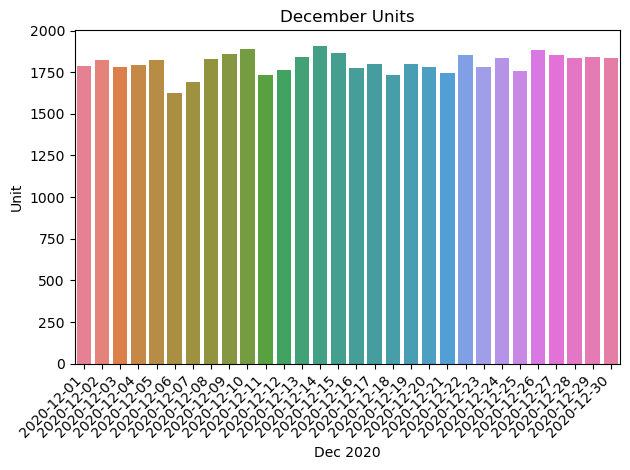

In [8]:
ax = sns.barplot(x='Date', y= 'Unit', data = df_dec, hue = 'Date', legend = False)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Dec 2020')
ax.set_ylabel('Unit')
ax.set_title('December Units')
plt.tight_layout()
plt.show()

In [13]:
sns.set_style("darkgrid")

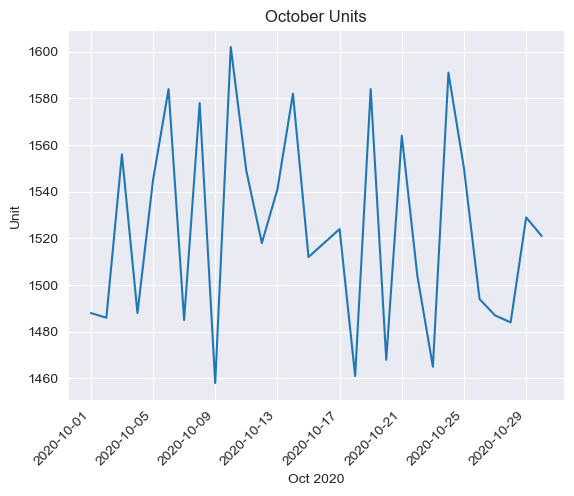

In [90]:
# PLOTTING LINE CHARTS FOR MONTHLY UNIT VALUES
sns.lineplot(x='Date', y= 'Unit', data = df_oct)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Oct 2020')
plt.ylabel('Unit')
plt.title('October Units')
plt.show()

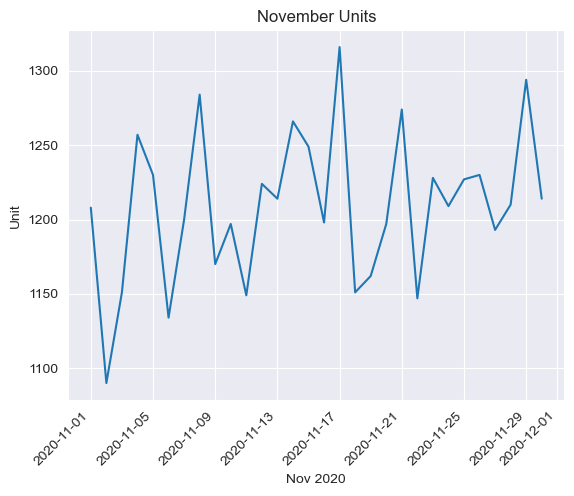

In [91]:
sns.lineplot(x='Date', y= 'Unit', data = df_nov)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nov 2020')
plt.ylabel('Unit')
plt.title('November Units')
plt.show()

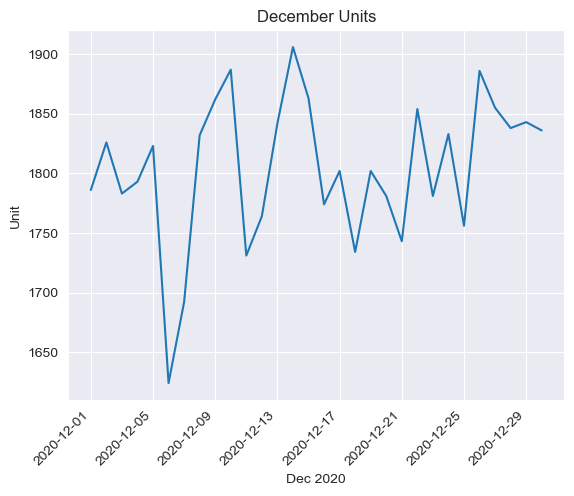

In [92]:
sns.lineplot(x='Date', y='Unit', data = df_dec)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dec 2020')
plt.ylabel('Unit')
plt.title('December Units')
plt.show()

In [9]:
# DESCRIBING DATA
df.describe(exclude=['datetime','object'])

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [12]:
df_oct.describe(exclude=['datetime','object'])

,Unit,Sales
count,30.000000,3.000000e+01
mean,1523.866667,3.809667e+06
std,43.041867,1.076047e+05
min,1458.000000,3.645000e+06
25%,1487.250000,3.718125e+06
50%,1519.500000,3.798750e+06
75%,1554.500000,3.886250e+06
max,1602.000000,4.005000e+06


In [13]:
df_nov.describe(exclude=['datetime','object'])

,Unit,Sales
count,30.000000,3.000000e+01
mean,1209.100000,3.022750e+06
std,51.177413,1.279435e+05
min,1090.000000,2.725000e+06
25%,1175.750000,2.939375e+06
50%,1209.500000,3.023750e+06
75%,1230.000000,3.075000e+06
max,1316.000000,3.290000e+06


In [14]:
df_dec.describe(exclude=['datetime','object'])

,Unit,Sales
count,30.000000,3.000000e+01
mean,1804.400000,4.511000e+06
std,61.370329,1.534258e+05
min,1624.000000,4.060000e+06
25%,1775.750000,4.439375e+06
50%,1812.500000,4.531250e+06
75%,1842.750000,4.606875e+06
max,1906.000000,4.765000e+06


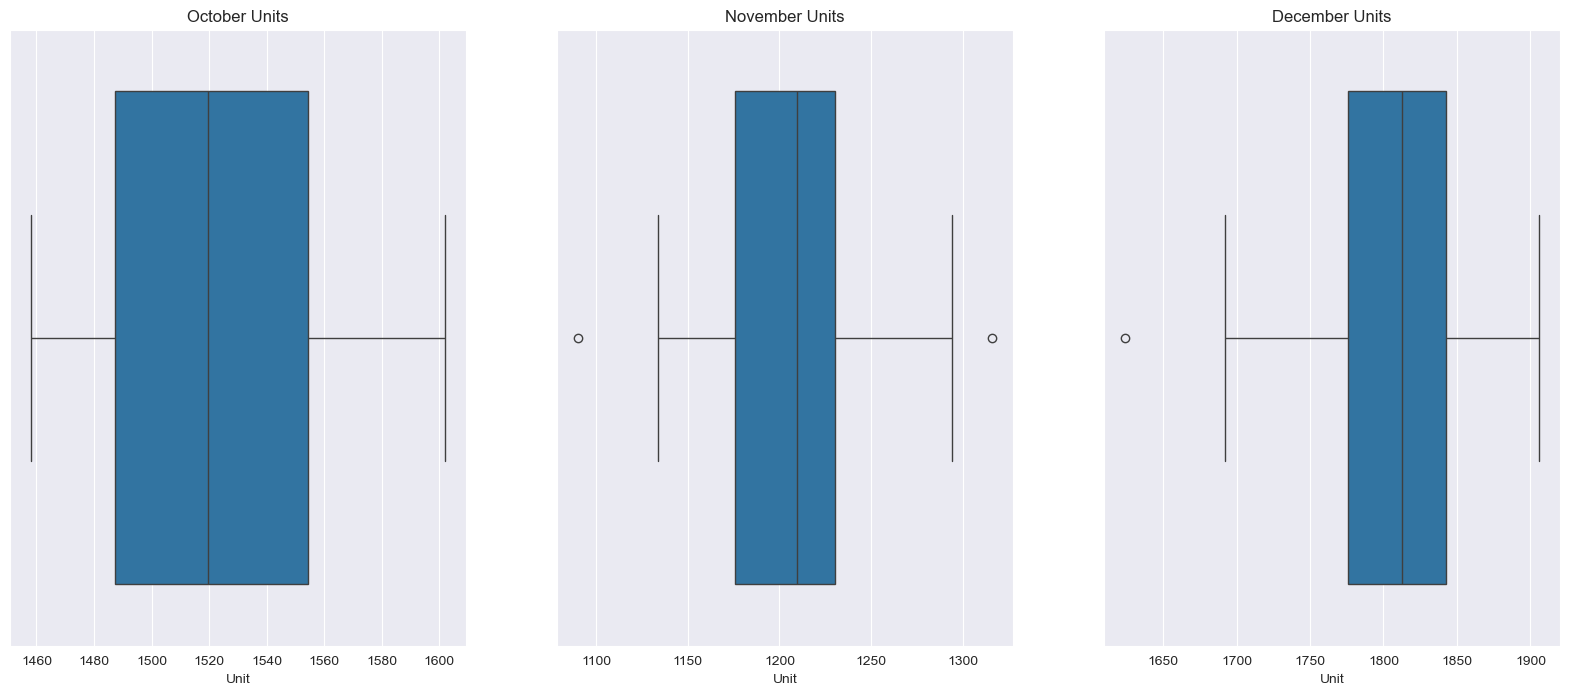

In [21]:
# BOX PLOT ANALYSIS
# UNIT ANALYSIS
fig, axes = plt.subplots(1,3,figsize=(20,8))
bp_oct = sns.boxplot(x = 'Unit', data= df_oct, ax= axes[0]) # Oct Unit mean = 1523
bp_nov = sns.boxplot(x = 'Unit', data= df_nov, ax= axes[1]) # Nov Unit mean = 1209
bp_dec = sns.boxplot(x = 'Unit', data= df_dec, ax= axes[2]) # Dec Unit mean = 1804
bp_oct.set(title='October Units')
bp_nov.set(title='November Units')
bp_dec.set(title='December Units')
plt.show()

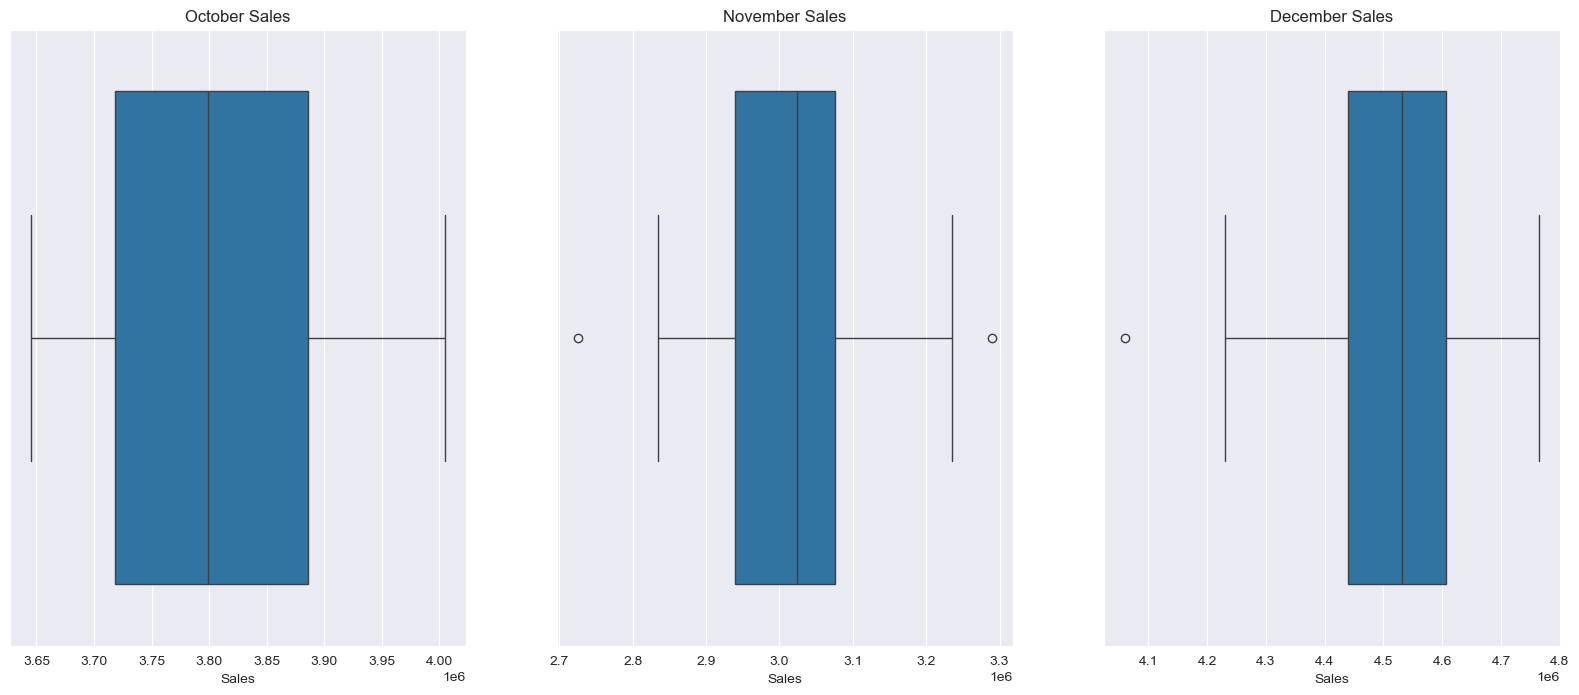

In [22]:
# SALES ANALYSIS
fig, axes = plt.subplots(1,3,figsize=(20,8))
bp_oct = sns.boxplot(x = 'Sales', data= df_oct, ax= axes[0]) # Oct Sales mean = 3.81e+06
bp_nov = sns.boxplot(x = 'Sales', data= df_nov, ax= axes[1]) # Nov Sales mean = 3.02e+06
bp_dec = sns.boxplot(x = 'Sales', data= df_dec, ax= axes[2]) # Dec Sales mean = 4.51e+06
bp_oct.set(title='October Sales')
bp_nov.set(title='November Sales')
bp_dec.set(title='December Sales')
plt.show()

In [10]:
# MONTHLY PLOTS AND ANALYSIS
# Overall Unit and Sales figures
oct_days = df_oct.index.day
print(oct_days.astype('str'))
nov_days = df_nov.index.day
print(nov_days.astype('str'))
dec_days = df_dec.index.day
print(dec_days.astype('str'))

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')


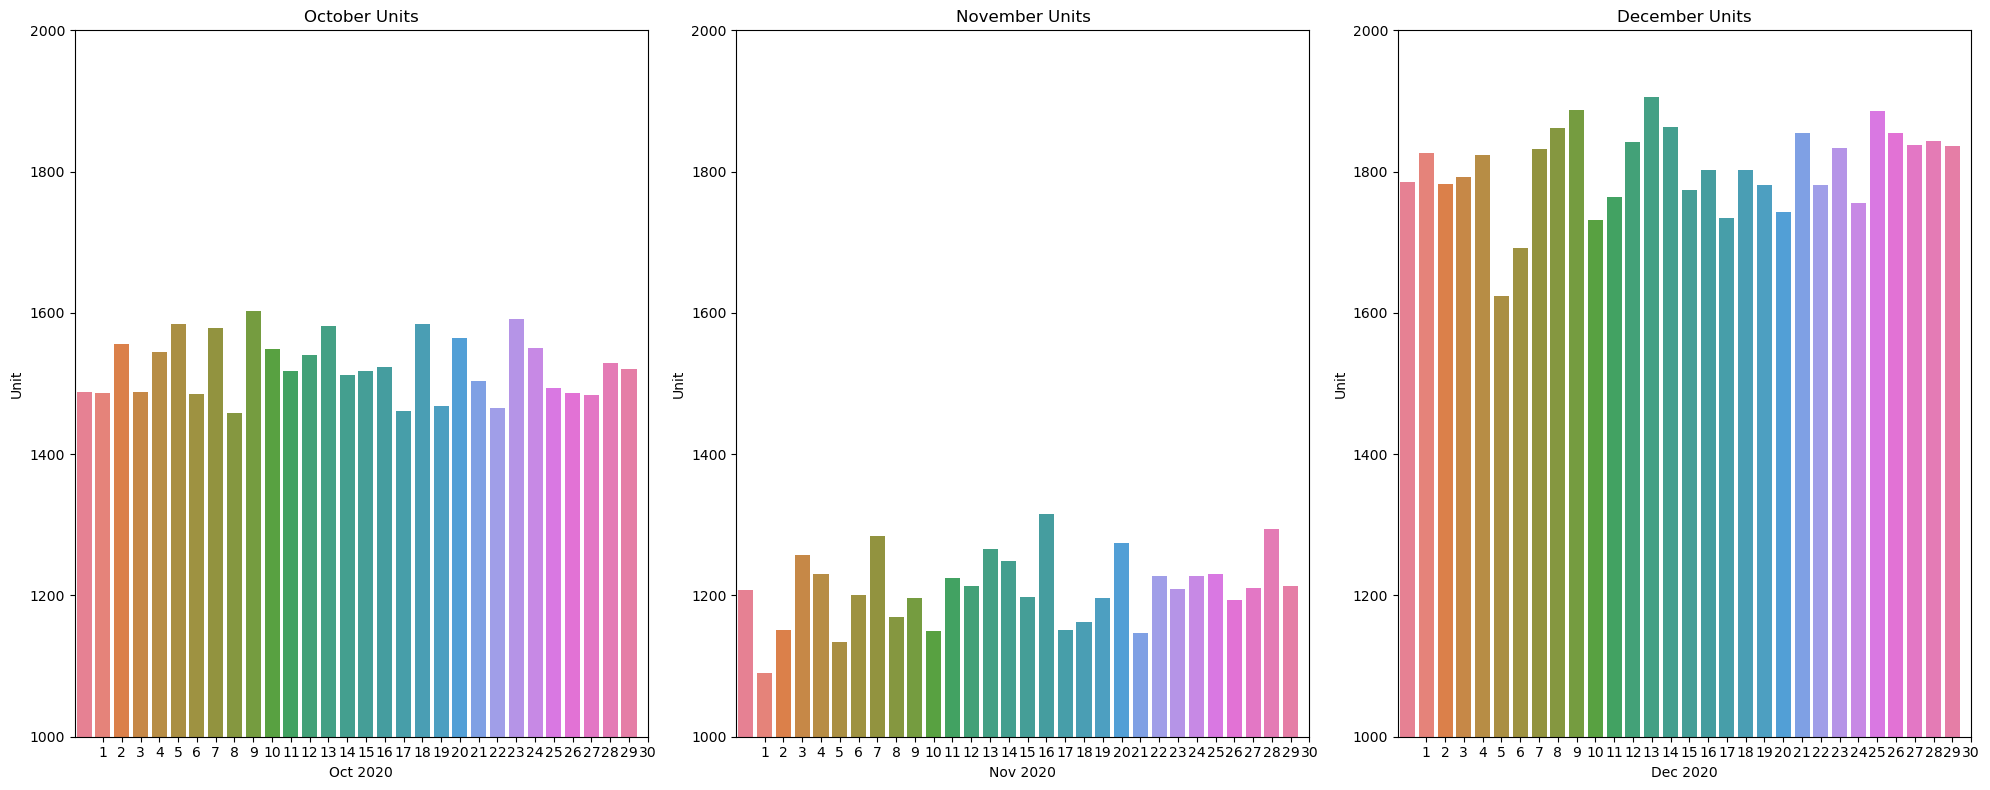

In [11]:
# UNITS SOLD IN OCT, NOV, DEC
fig, axes = plt.subplots(1,3,figsize=(20,8))
barplot_oct = sns.barplot(x='Date', y= 'Unit', data = df_oct, hue = 'Date', legend = False, ax= axes[0])
barplot_oct.set(xlabel='Oct 2020', ylabel='Unit', xticks = oct_days, xticklabels = oct_days, ylim= (1000,2000), title='October Units')

barplot_nov = sns.barplot(x='Date', y= 'Unit', data = df_nov, hue = 'Date', legend = False, ax= axes[1])
barplot_nov.set(xlabel='Nov 2020', ylabel='Unit', xticks = nov_days, xticklabels = nov_days, ylim= (1000,2000), title='November Units')

barplot_dec = sns.barplot(x='Date', y= 'Unit', data = df_dec, hue = 'Date', legend = False, ax= axes[2])
barplot_dec.set(xlabel='Dec 2020', ylabel='Unit', xticks = dec_days, xticklabels = dec_days, ylim= (1000,2000), title='December Units')
plt.tight_layout()
plt.show()

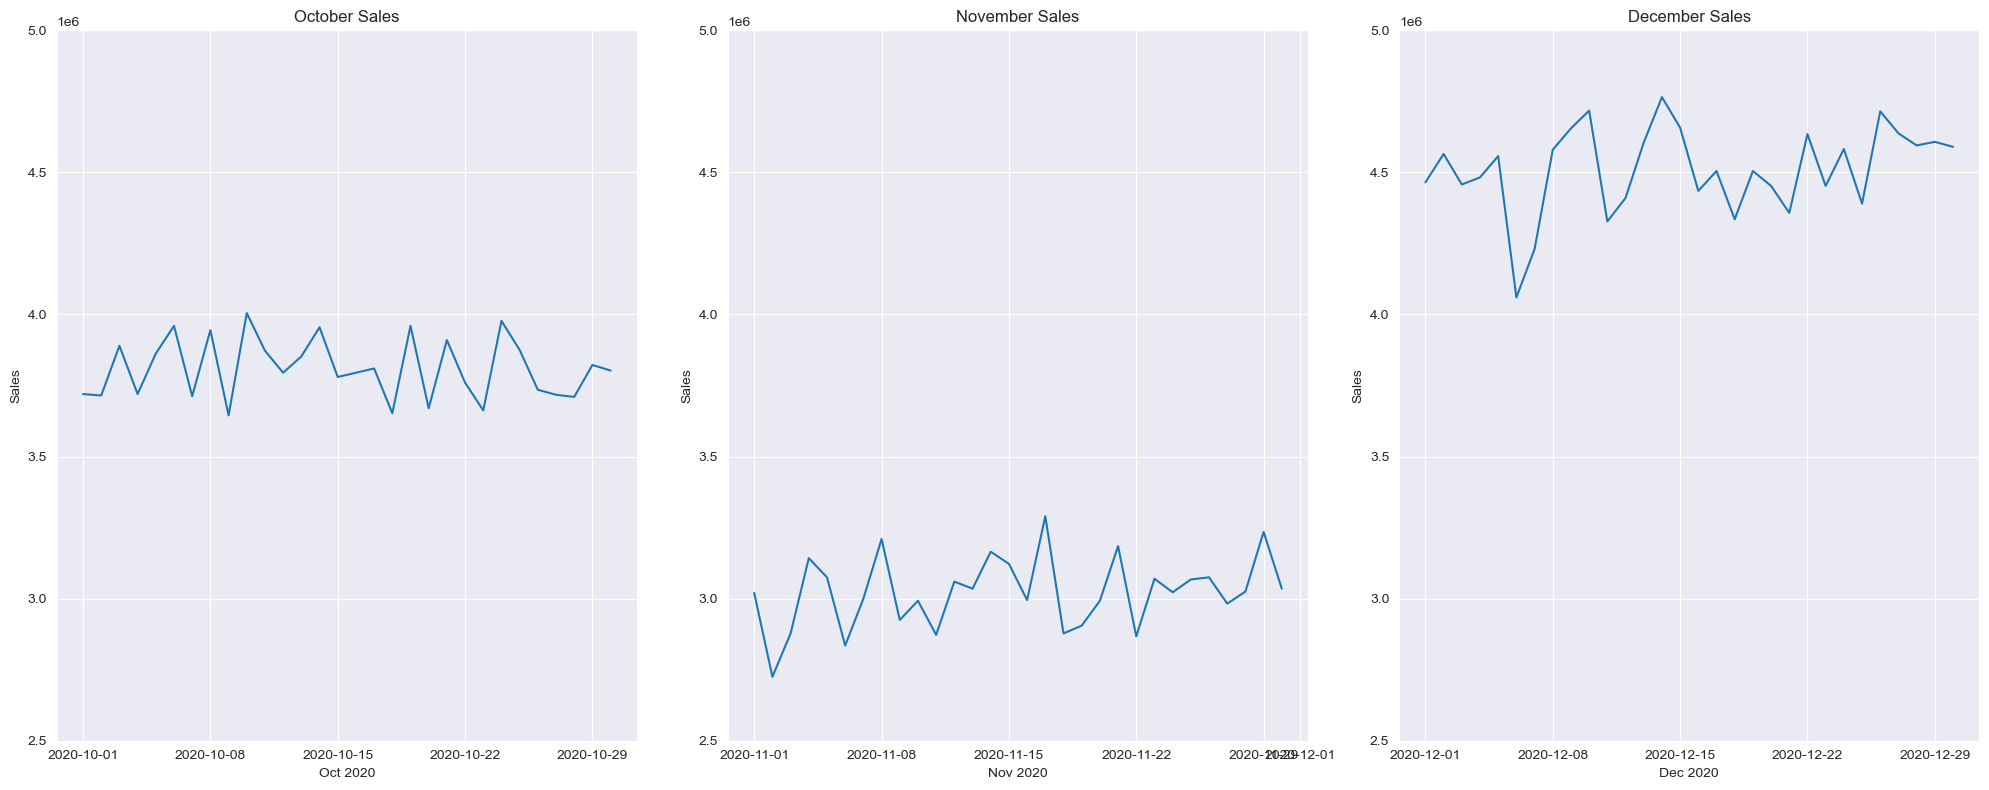

In [17]:
# SALES NUMBERS FOR OCT, NOV, DEC
import matplotlib
fig, axes = plt.subplots(1,3,figsize=(20,8))
lineplot_oct = sns.lineplot(x='Date', y='Sales', data = df_oct, ax = axes[0])
lineplot_oct.set(xlabel='Oct 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='October Sales')
lineplot_oct.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))

lineplot_nov = sns.lineplot(x='Date', y='Sales', data = df_nov, ax = axes[1])
lineplot_nov.set(xlabel='Nov 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='November Sales')
lineplot_nov.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))

lineplot_dec = sns.lineplot(x='Date', y='Sales', data = df_dec, ax = axes[2])
lineplot_dec.set(xlabel='Dec 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='December Sales')
lineplot_dec.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))
#locator determines where the major ticks should appear along the xaxis. Here ticks will be placed on the 1st, 8th, 15th, 22nd, and 29th day of month.
plt.tight_layout() 
plt.show()

<Axes: xlabel='Date', ylabel='Sales'>

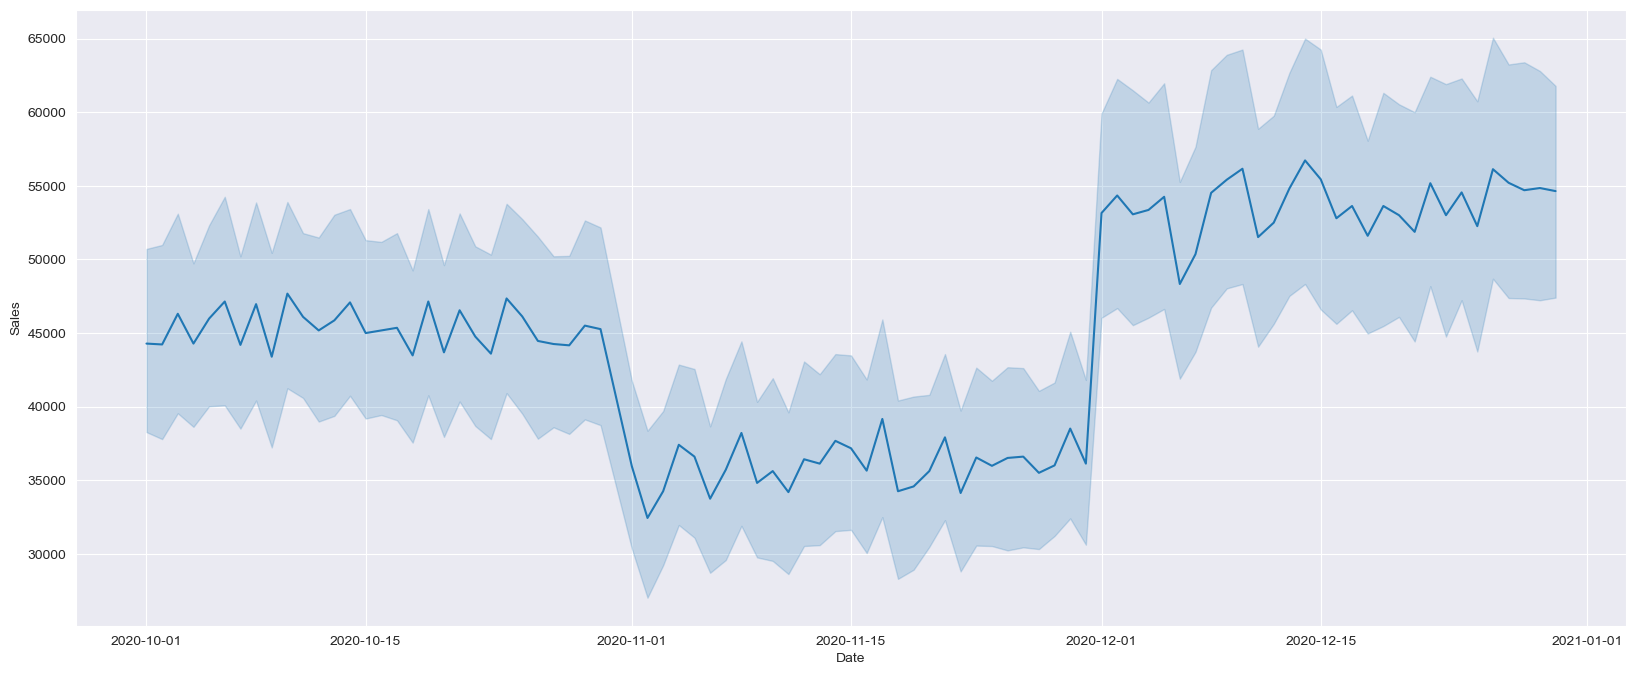

In [18]:
# CONSOLIDATED THREE MONTH SALES PLOT
fig, axes = plt.subplots(figsize=(20,8))
sns.lineplot(x='Date', y='Sales', data = df)

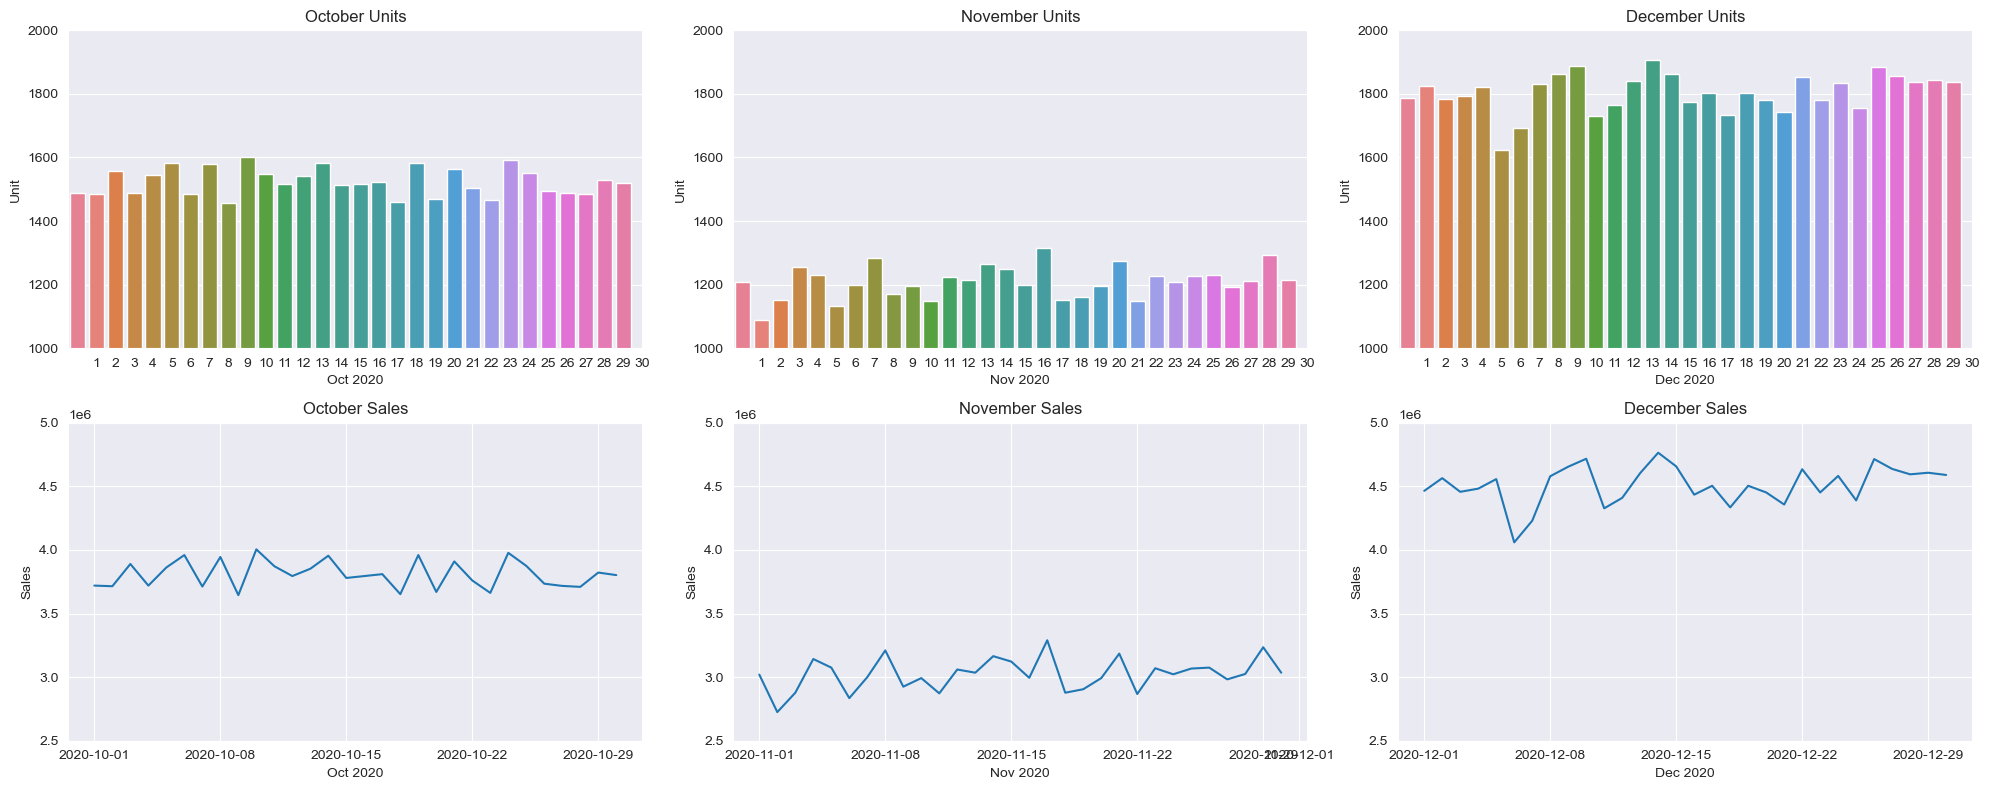

In [19]:
# COMPREHENSIVE SNAPSHOT
fig, axes = plt.subplots(2,3,figsize=(20,8))
barplot_oct = sns.barplot(x='Date', y= 'Unit', data = df_oct, hue = 'Date', legend = False, ax= axes[0,0])
barplot_oct.set(xlabel='Oct 2020', ylabel='Unit', xticks = oct_days, xticklabels = oct_days, ylim= (1000,2000), title='October Units')

barplot_nov = sns.barplot(x='Date', y= 'Unit', data = df_nov, hue = 'Date', legend = False, ax= axes[0,1])
barplot_nov.set(xlabel='Nov 2020', ylabel='Unit', xticks = nov_days, xticklabels = nov_days, ylim= (1000,2000), title='November Units')

barplot_dec = sns.barplot(x='Date', y= 'Unit', data = df_dec, hue = 'Date', legend = False, ax= axes[0,2])
barplot_dec.set(xlabel='Dec 2020', ylabel='Unit', xticks = dec_days, xticklabels = dec_days, ylim= (1000,2000), title='December Units')

lineplot_oct = sns.lineplot(x='Date', y='Sales', data = df_oct, ax = axes[1,0])
lineplot_oct.set(xlabel='Oct 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='October Sales')
lineplot_oct.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))

lineplot_nov = sns.lineplot(x='Date', y='Sales', data = df_nov, ax = axes[1,1])
lineplot_nov.set(xlabel='Nov 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='November Sales')
lineplot_nov.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))

lineplot_dec = sns.lineplot(x='Date', y='Sales', data = df_dec, ax = axes[1,2])
lineplot_dec.set(xlabel='Dec 2020', ylabel='Sales', ylim = (2.5e6, 5.0e6), title='December Sales')
lineplot_dec.xaxis.set_major_locator(matplotlib.dates.DayLocator(bymonthday=range(1,30,7)))

plt.tight_layout()
plt.show()

In [27]:
# ANALYSIS OF STATE WISE SALES IN AUSTRALIA
state_pivot = pd.pivot_table(df, index = 'State', values = ['Sales','Unit'], aggfunc=['sum', 'mean'])
state_pivot

sum                 mean           
           Sales   Unit         Sales       Unit
State                                           
NSW     74970000  29988  69416.666667  27.766667
NT      22580000   9032  20907.407407   8.362963
QLD     33417500  13367  30942.129630  12.376852
SA      58857500  23543  54497.685185  21.799074
TAS     22760000   9104  21074.074074   8.429630
VIC    105565000  42226  97745.370370  39.098148
WA      22152500   8861  20511.574074   8.204630

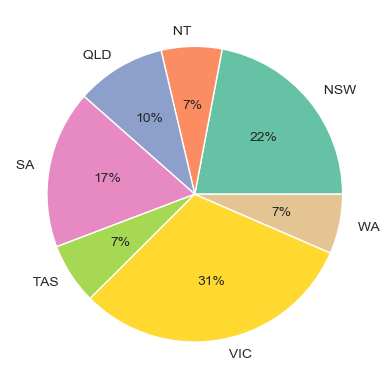

In [38]:
labels = state_pivot['mean']['Sales'].index.to_list()
# The index object contains the labels for the rows of that specific subset of the hierarchical columns, 'mean' and 'Sales'.
colors = sns.color_palette('Set2')
plt.pie(state_pivot['mean']['Sales'], labels = labels, colors = colors, autopct = '%.0f%%')
# display percentage labels on a pie chart. 0 decimal of floating (f) value with % symbol
plt.show() # 70% of business comes from the three states VIC, NSW and SA

In [28]:
# ANALYSIS OF GROUP WISE SALES IN AUSTRALIA
group_pivot = pd.pivot_table(df, index = 'Group', values = ['Sales','Unit'], aggfunc=['sum', 'mean'])
group_pivot

sum                 mean           
            Sales   Unit         Sales       Unit
Group                                            
Kids     85072500  34029  45011.904762  18.004762
Men      85750000  34300  45370.370370  18.148148
Seniors  84037500  33615  44464.285714  17.785714
Women    85442500  34177  45207.671958  18.083069

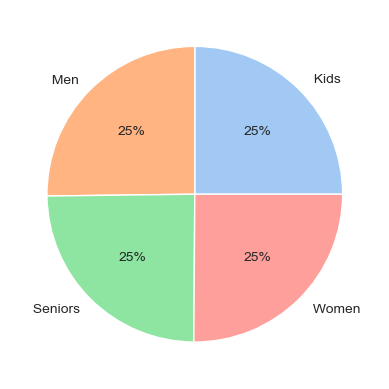

In [41]:
labels = group_pivot['mean']['Sales'].index.to_list()
colors = sns.color_palette('pastel')
plt.pie(group_pivot['mean']['Sales'], labels = labels, colors = colors, autopct = '%.0f%%')
plt.show() # all the business are equi-distributed in terms of Group

In [29]:
# ANALYSIS OF TIME WISE SALES IN AUSTRALIA
time_pivot = pd.pivot_table(df, index = 'Time', values = ['Sales','Unit'], aggfunc=['sum', 'mean'])
time_pivot

sum                 mean           
               Sales   Unit         Sales       Unit
Time                                                
Afternoon  114007500  45603  45241.071429  18.096429
Evening    112087500  44835  44479.166667  17.791667
Morning    114207500  45683  45320.436508  18.128175

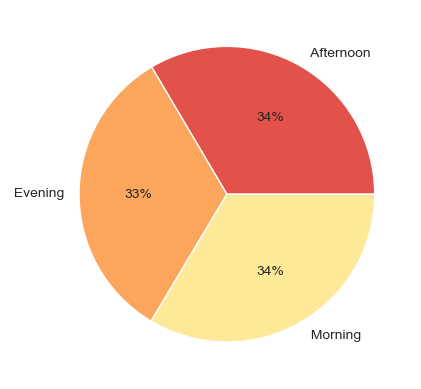

In [40]:
labels = time_pivot['mean']['Sales'].index.to_list()
colors = sns.color_palette('Spectral')
plt.pie(time_pivot['mean']['Sales'], labels = labels, colors = colors, autopct = '%.0f%%')
plt.show() # all the business are equi-distributed in terms of Time of the day

## Report

This report is based on the analysis of three month data - Oct, Nov and Dec 2020. The data of 31-Oct-2020 and 31-Dec-2020 is missing and has been ignored. Based on the analysis of monthly data, the apparel business saw a subdued activity in the month of November in terms of both Unit and Sales. However, the month of December had a stellar performance of nearly 1.5 times the month of November,in terms of both Unit and Sales.

In terms of the State-wise analysis, just 3 states contributed to the overall three-month sales - VIC, NSW and SA. The remaining states' contribution was just around 30%. The topper state was VIC with 31%, while the lagged states were WA, NT and TAS (with a contribution of just 7% each).

The apparels were equally popular among different age groups - kids, men, women or seniors. No particular time was a bad time for AAL as the business was equally busy during all times of store business hours.

Sales Analysis Report (Q4)
1. State-wise Sales Analysis:
- Top states: VIC
- Lowest performing states: WA
2. Sales Distribution by Group:
- Highest sales category: Men
- Lowest sales category: Seniors
3. Time-of-Day Sales Analysis:
- Peak hours: Morning
- Off-peak hours: Afternoon
4. Sales Trends:
- Daily: Sales fluctuations throughout Q4
- Weekly: Identified high and low sales weeks
- Monthly: Sales trends for each month in Q4
- Quarterly: Overall Q4 sales comparison by state
Recommendations:
- Optimize inventory for peak hours
- Improve marketing strategies in low-sales states
- Leverage Q4 sales trends for better promotions
"""
print(report)